In [5]:
import cv2 as cv
import PIL
import numpy as np
import imutils
from matplotlib import pyplot as plt
from PIL import Image
from pylab import *

In [2]:
!ls figs

11.jpg	      elderly.jpg			j.png	    simpsons.png
baby.png      hero.png				kids.jpg    sudoku.jpg
blobs.png     HubIA_Poligonos_data_cultura.csv	logo.png    tetris.png
cinza.jpg     imgTeste.jpg			messi5.jpg
cinzaout.jpg  JP2.jpg				mug.jpg
degrade.png   JP.jpeg				noisy.jpg


## Mostrando uma imagem com PIL
![title](figs/imgTeste.jpg)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


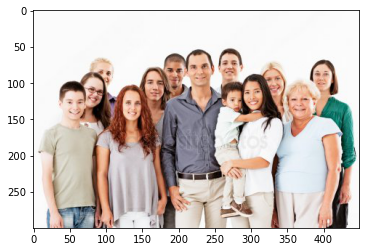

In [7]:
im = Image.open('imgTeste.jpg')
print(type(im))
img = array(im)
print(type(img))
plt.imshow(img)

# Mostrando imagem com openCV

<class 'numpy.ndarray'>


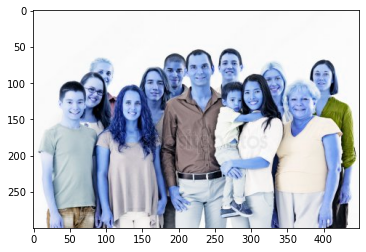

In [9]:
img = cv.imread('imgTeste.jpg')
print(type(img))
plt.imshow(img)

* As cores da nossa imagem estão erradas!

* O OpenCV representa imagens RGB como matrizes NumPy multidimensionais mas em ordem inversa

* imagens são representadas em ordem BGR por padrão!

* Para mostrar corretamente é necessário converter de BGR para RGB:

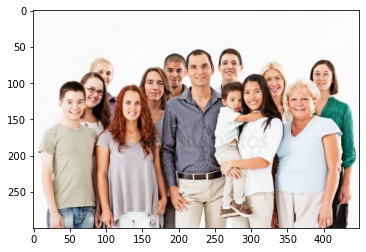

In [10]:
img = cv.imread('imgTeste.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## obtendo tamanho da imagem (usando recursos do numpy)
* Nesse exemplo, Altura x Largura x Quantidade de Canais

In [11]:
img.shape

(300, 450, 3)

## Obtendo valores de canais de um único pixel

In [12]:
(B, G, R) = img[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=37, G=24, B=18


## Alterando valor de um pixel

In [13]:
px = img[148,55]
print( px )

blue = img[148,55,2]
print( blue )

img[50,50] = [255,255,255]
print( img[50,50] )

[197 216 253]
253
[255 255 255]


## Alterando valor de um bloco de pixels

In [14]:
img[50:70,50:70] = [255,255,0]

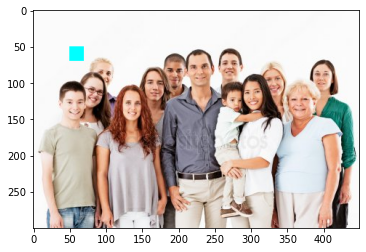

In [15]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Alteração em todos os pixels com PIL
* A imagem original é aberta com convert L - grayscale
* O primeiro exemplo inverte os níveis de cinza da imagem, - im2
* o segundo fixa as intensidades no intervalo 100 ... 200  - im3
* o terceiro aplica uma função quadrática, que diminui os valores dos pixels mais escuros. - im4

In [109]:
im1 = array(Image.open('imgTeste.jpg'))
im = array(Image.open('imgTeste.jpg').convert('L'))
im2 = 255 - im #invert image
im3 = (100.0/255) * im + 100  #clamp to interval 100...200 
im4 = 255.0 * (im/255.0)**2 #squared

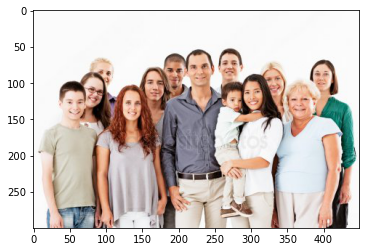

In [110]:
plt.imshow(im1)

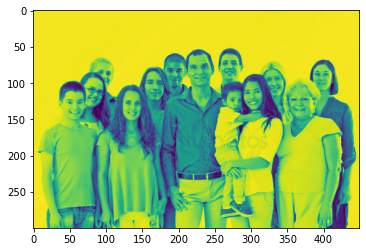

In [111]:
plt.imshow(im)

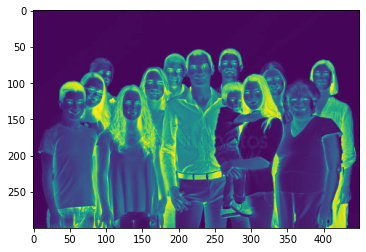

In [112]:
plt.imshow(im2)

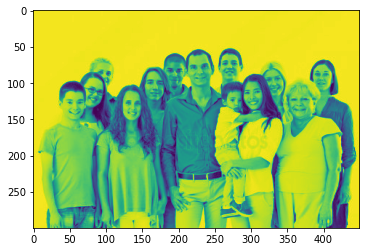

In [113]:
plt.imshow(im3)

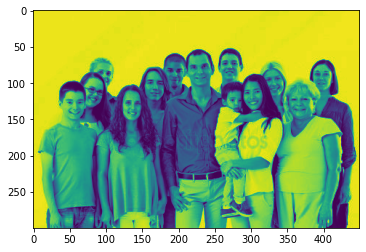

In [114]:
plt.imshow(im4)

## Abrindo uma imagem em tons de cinza

(480, 1120, 3)


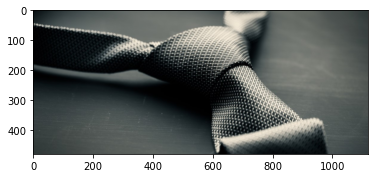

In [16]:
img = cv.imread('cinza.jpg')
print(img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [17]:
img = cv.imread("cinza.jpg", -1) 
cv.imwrite("cinzaout.jpg", img) 

True

(480, 1120)


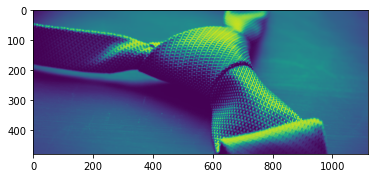

In [18]:
img = cv.imread('cinzaout.jpg',0)
print(img.shape)
plt.imshow(img)

## Crop e Slicing de imagem
* O primeiro parâmetro corta horizontalmente e segundo verticalmente

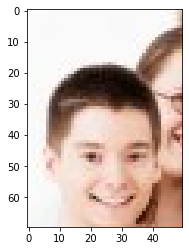

In [22]:
img = cv.imread('imgTeste.jpg')
roi = img[80:150, 30:80]
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))

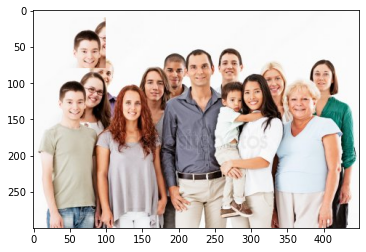

In [23]:
img = cv.imread('imgTeste.jpg')
img[10:80,50:100] = roi
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

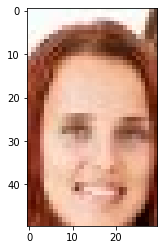

In [24]:
roi = img[100:150, 120:150]
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))

## Incluindo elemento na imagem

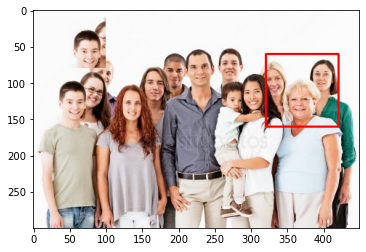

In [25]:
output = img.copy()
cv.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

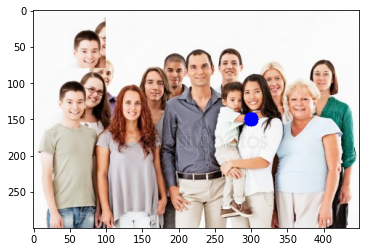

In [26]:
output = img.copy()
cv.circle(output, (300, 150), 10, (255, 0, 0), -1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

## Incluindo texto na imagem

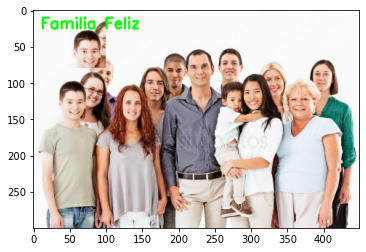

In [30]:
output = img.copy()
cv.putText(output, "Familia Feliz", (10, 25), 
           cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

## Representação piramide
* Diminuindo a quantidade de pixels por região da imagem

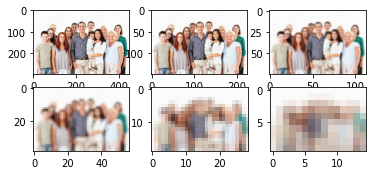

In [31]:
img = cv.imread('imgTeste.jpg')

layer = img.copy() 

for i in range(6): 
    plt.subplot(3, 3, i + 1) 
  
    plt.imshow(cv.cvtColor(layer, cv.COLOR_BGR2RGB))
    layer = cv.pyrDown(layer) 

# Alterando tamanho da imagem
* Ignorando aspect ratio

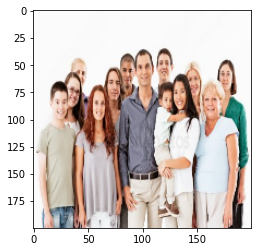

In [32]:
resized = cv.resize(img, (200, 200))
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

# Resize 
* considerando aspect ratio


Dimensões Originais :  (300, 450, 3)
novas dimensões :  (180, 270, 3)


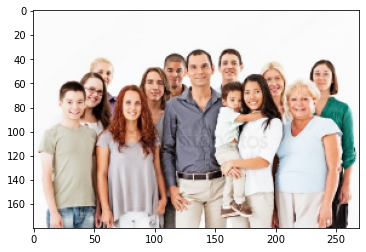

In [35]:
img = cv.imread('imgTeste.jpg', cv.IMREAD_UNCHANGED)
 
print('Dimensões Originais : ',img.shape)
 
scale_percent = 60 # porcentagem da imagem original

width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv.resize(img,dim)
 
print('novas dimensões : ',resized.shape)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

## Alterando posição da imagem
* Função warpAffine

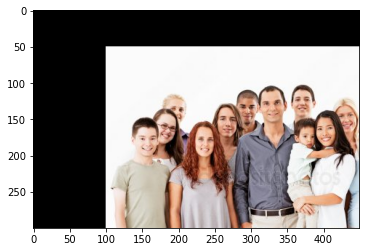

In [36]:
img = cv.imread('imgTeste.jpg')
rows,cols,channels = img.shape

M = np.float32([[1,0,100],[0,1,50]])

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

## Rotacionando imagem
* Rotação simples cortando a imagem

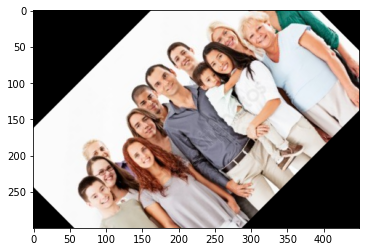

In [39]:
img = cv.imread('imgTeste.jpg')

rows,cols,channels = img.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

# método rotate_bound
* Rotação ajustando as bordas para não haver cortes

True

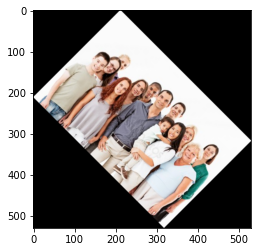

In [53]:
img = cv.imread('imgTeste.jpg')

rotated = imutils.rotate_bound(img, 45)

plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))



# visualização interativa

Please click 3 points


KeyboardInterrupt: 

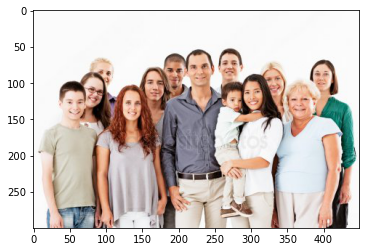

In [47]:
from PIL import Image
from pylab import *
im = array(Image.open('imgTeste.jpg'))
imshow(im)
print ('Please click 3 points')
x = ginput(3)
print ('you clicked:',x)
show()

True

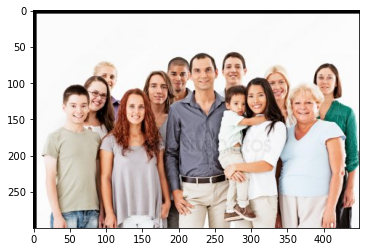

In [85]:
img = cv.imread('imgTeste.jpg')
rows,cols,channels = img.shape

M = np.float32([[1,0,5],[0,1,5]])

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
cv.imwrite('imgTeste-2.jpg',dst) 

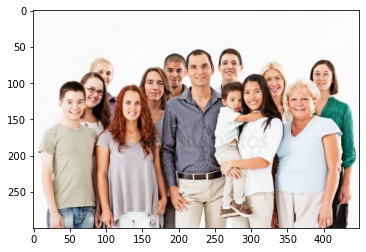

In [73]:
img = cv.imread('imgTeste.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

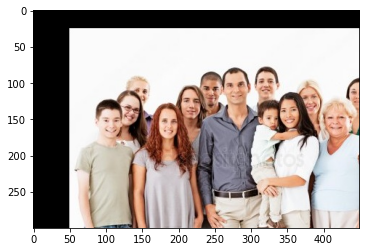

In [74]:
img = cv.imread('imgTeste-2.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Histograma de canais
* função calchist 

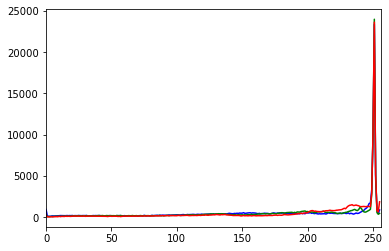

In [75]:
img = cv.imread('imgTeste.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    H1 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(H1,color = col)
    plt.xlim([0,256])
plt.show()

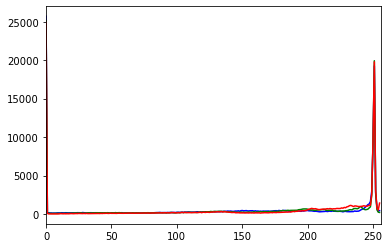

In [76]:
img = cv.imread('imgTeste-2.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    H2 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(H2,color = col)
    plt.xlim([0,256])
plt.show()

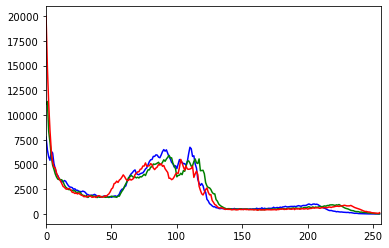

In [77]:
img = cv.imread('cinza.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    H3 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(H3,color = col)
    plt.xlim([0,256])
plt.show()

# Comparando histogramas
* função compareHist

In [93]:
print(cv.compareHist(H1, H2, cv.HISTCMP_CORREL))

0.6630680277678416


In [94]:
print(cv.compareHist(H1, H3, cv.HISTCMP_CORREL))

NameError: name 'cv2' is not defined

# Comparando histogramas - para cana canal de cor

In [90]:
img1 = cv.imread('imgTeste.jpg')
HT10 = cv.calcHist([img1],[0],None,[256],[0,256])
HT11 = cv.calcHist([img1],[1],None,[256],[0,256])
HT12 = cv.calcHist([img1],[2],None,[256],[0,256])

img2 = cv.imread('imgTeste-2.jpg')
HT102 = cv.calcHist([img2],[0],None,[256],[0,256])
HT112 = cv.calcHist([img2],[1],None,[256],[0,256])
HT122 = cv.calcHist([img2],[2],None,[256],[0,256])


print(cv.compareHist(HT10, HT102, cv.HISTCMP_CORREL))
print(cv.compareHist(HT11, HT112, cv.HISTCMP_CORREL))
print(cv.compareHist(HT12, HT122, cv.HISTCMP_CORREL))

0.9889531243749489
0.9897735908476638
0.99016326558022


In [95]:
img1 = cv.imread('imgTeste.jpg')
HT10 = cv.calcHist([img1],[0],None,[256],[0,256])
HT11 = cv.calcHist([img1],[1],None,[256],[0,256])
HT12 = cv.calcHist([img1],[2],None,[256],[0,256])

img2 = cv.imread('cinza.jpg')
HT102 = cv.calcHist([img2],[0],None,[256],[0,256])
HT112 = cv.calcHist([img2],[1],None,[256],[0,256])
HT122 = cv.calcHist([img2],[2],None,[256],[0,256])


print(cv.compareHist(HT10, HT102, cv.HISTCMP_CORREL))
print(cv.compareHist(HT11, HT112, cv.HISTCMP_CORREL))
print(cv.compareHist(HT12, HT122, cv.HISTCMP_CORREL))

-0.1701816668981718
-0.17841271335456493
-0.17321572864103835


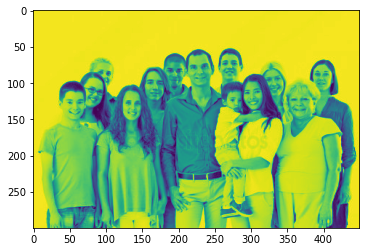